## 통계청 출생아수(시도/시/군/구)
http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1B81A01&vw_cd=MT_GTITLE01&list_id=101&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01

* 관련기사 : [저출산 시대, 두 도시 이야기 - 경향신문](http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202006271128001)

In [1]:
import pandas as pd

In [2]:
df_kosis = pd.read_csv("data/population_kosis_1997_2018.csv", encoding="cp949")
df_kosis.shape

(19, 793)

In [3]:
pd.options.display.max_columns = 793

In [4]:
df_kosis.head()

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,1997. 04,1997. 04.1,1997. 04.2,1997. 05,1997. 05.1,1997. 05.2,1997. 06,1997. 06.1,1997. 06.2,1997. 07,1997. 07.1,1997. 07.2,1997. 08,1997. 08.1,1997. 08.2,1997. 09,1997. 09.1,1997. 09.2,1997. 10,1997. 10.1,1997. 10.2,1997. 11,1997. 11.1,1997. 11.2,1997. 12,1997. 12.1,1997. 12.2,1998. 01,1998. 01.1,1998. 01.2,1998. 02,1998. 02.1,1998. 02.2,1998. 03,1998. 03.1,1998. 03.2,1998. 04,1998. 04.1,1998. 04.2,1998. 05,1998. 05.1,1998. 05.2,1998. 06,1998. 06.1,1998. 06.2,1998. 07,1998. 07.1,1998. 07.2,1998. 08,1998. 08.1,1998. 08.2,1998. 09,1998. 09.1,1998. 09.2,1998. 10,1998. 10.1,1998. 10.2,1998. 11,1998. 11.1,1998. 11.2,1998. 12,1998. 12.1,1998. 12.2,1999. 01,1999. 01.1,1999. 01.2,1999. 02,1999. 02.1,1999. 02.2,1999. 03,1999. 03.1,1999. 03.2,1999. 04,1999. 04.1,1999. 04.2,1999. 05,1999. 05.1,1999. 05.2,1999. 06,1999. 06.1,1999. 06.2,1999. 07,1999. 07.1,1999. 07.2,1999. 08,1999. 08.1,1999. 08.2,1999. 09,1999. 09.1,1999. 09.2,1999. 10,1999. 10.1,1999. 10.2,1999. 11,1999. 11.1,1999. 11.2,1999. 12,1999. 12.1,1999. 12.2,2000. 01,2000. 01.1,2000. 01.2,2000. 02,2000. 02.1,2000. 02.2,2000. 03,2000. 03.1,2000. 03.2,2000. 04,2000. 04.1,2000. 04.2,2000. 05,2000. 05.1,2000. 05.2,2000. 06,2000. 06.1,2000. 06.2,2000. 07,2000. 07.1,2000. 07.2,2000. 08,2000. 08.1,2000. 08.2,2000. 09,2000. 09.1,2000. 09.2,2000. 10,2000. 10.1,2000. 10.2,2000. 11,2000. 11.1,2000. 11.2,2000. 12,2000. 12.1,2000. 12.2,2001. 01,2001. 01.1,2001. 01.2,2001. 02,2001. 02.1,2001. 02.2,2001. 03,2001. 03.1,2001. 03.2,2001. 04,2001. 04.1,2001. 04.2,2001. 05,2001. 05.1,2001. 05.2,2001. 06,2001. 06.1,2001. 06.2,2001. 07,2001. 07.1,2001. 07.2,2001. 08,2001. 08.1,2001. 08.2,2001. 09,2001. 09.1,2001. 09.2,2001. 10,2001. 10.1,2001. 10.2,2001. 11,2001. 11.1,2001. 11.2,2001. 12,2001. 12.1,2001. 12.2,2002. 01,2002. 01.1,2002. 01.2,2002. 02,2002. 02.1,2002. 02.2,2002. 03,2002. 03.1,2002. 03.2,2002. 04,2002. 04.1,2002. 04.2,2002. 05,2002. 05.1,2002. 05.2,2002. 06,2002. 06.1,2002. 06.2,2002. 07,2002. 07.1,2002. 07.2,2002. 08,2002. 08.1,2002. 08.2,2002. 09,2002. 09.1,2002. 09.2,2002. 10,2002. 10.1,2002. 10.2,2002. 11,2002. 11.1,2002. 11.2,2002. 12,2002. 12.1,2002. 12.2,2003. 01,2003. 01.1,2003. 01.2,2003. 02,2003. 02.1,2003. 02.2,2003. 03,2003. 03.1,2003. 03.2,2003. 04,2003. 04.1,2003. 04.2,2003. 05,2003. 05.1,2003. 05.2,2003. 06,2003. 06.1,2003. 06.2,2003. 07,2003. 07.1,2003. 07.2,2003. 08,2003. 08.1,2003. 08.2,2003. 09,2003. 09.1,2003. 09.2,2003. 10,2003. 10.1,2003. 10.2,2003. 11,2003. 11.1,2003. 11.2,2003. 12,2003. 12.1,2003. 12.2,2004. 01,2004. 01.1,2004. 01.2,2004. 02,2004. 02.1,2004. 02.2,2004. 03,2004. 03.1,2004. 03.2,2004. 04,2004. 04.1,2004. 04.2,2004. 05,2004. 05.1,2004. 05.2,2004. 06,2004. 06.1,2004. 06.2,2004. 07,2004. 07.1,2004. 07.2,2004. 08,2004. 08.1,2004. 08.2,2004. 09,2004. 09.1,2004. 09.2,2004. 10,2004. 10.1,2004. 10.2,2004. 11,2004. 11.1,2004. 11.2,2004. 12,2004. 12.1,2004. 12.2,2005. 01,2005. 01.1,2005. 01.2,2005. 02,2005. 02.1,2005. 02.2,2005. 03,2005. 03.1,2005. 03.2,2005. 04,2005. 04.1,2005. 04.2,2005. 05,2005. 05.1,2005. 05.2,2005. 06,2005. 06.1,2005. 06.2,2005. 07,2005. 07.1,2005. 07.2,2005. 08,2005. 08.1,2005. 08.2,2005. 09,2005. 09.1,2005. 09.2,2005. 10,2005. 10.1,2005. 10.2,2005. 11,2005. 11.1,2005. 11.2,2005. 12,2005. 12.1,2005. 12.2,2006. 01,2006. 01.1,2006. 01.2,2006. 02,2006. 02.1,2006. 02.2,2006. 03,2006. 03.1,2006. 03.2,2006. 04,2006. 04.1,2006. 04.2,2006. 05,2006. 05.1,2006. 05.2,2006. 06,2006. 06.1,2006. 06.2,2006. 07,2006. 07.1,2006. 07.2,2006. 08,2006. 08.1,2006. 08.2,2006. 09,2006. 09.1,2006. 09.2,2006. 10,2006. 10.1,2006. 10.2,2006. 11,2006. 11.1,2006. 11.2,2006. 12,2006. 12.1,2006. 12.2,2007. 01,2007. 01.1,2007. 01.2,2007. 02,2007. 02.1,2007. 02.2,2007. 03,2007. 03.1,2007. 03.2,2007. 04,2007. 04.1,2007. 04.2,2007. 05,2007. 05.1,2007. 05.2,2007. 06,2007. 06.1,2007. 06.2,2007. 07,2007. 07.1,2007. 07.2,2007. 08,2007. 08.1,2007. 08.2,2007. 09,2007. 09.1,2007. 


### Tidy Data
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">
이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [5]:
df_kosis.head(1)

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,1997. 04,1997. 04.1,1997. 04.2,1997. 05,1997. 05.1,1997. 05.2,1997. 06,1997. 06.1,1997. 06.2,1997. 07,1997. 07.1,1997. 07.2,1997. 08,1997. 08.1,1997. 08.2,1997. 09,1997. 09.1,1997. 09.2,1997. 10,1997. 10.1,1997. 10.2,1997. 11,1997. 11.1,1997. 11.2,1997. 12,1997. 12.1,1997. 12.2,1998. 01,1998. 01.1,1998. 01.2,1998. 02,1998. 02.1,1998. 02.2,1998. 03,1998. 03.1,1998. 03.2,1998. 04,1998. 04.1,1998. 04.2,1998. 05,1998. 05.1,1998. 05.2,1998. 06,1998. 06.1,1998. 06.2,1998. 07,1998. 07.1,1998. 07.2,1998. 08,1998. 08.1,1998. 08.2,1998. 09,1998. 09.1,1998. 09.2,1998. 10,1998. 10.1,1998. 10.2,1998. 11,1998. 11.1,1998. 11.2,1998. 12,1998. 12.1,1998. 12.2,1999. 01,1999. 01.1,1999. 01.2,1999. 02,1999. 02.1,1999. 02.2,1999. 03,1999. 03.1,1999. 03.2,1999. 04,1999. 04.1,1999. 04.2,1999. 05,1999. 05.1,1999. 05.2,1999. 06,1999. 06.1,1999. 06.2,1999. 07,1999. 07.1,1999. 07.2,1999. 08,1999. 08.1,1999. 08.2,1999. 09,1999. 09.1,1999. 09.2,1999. 10,1999. 10.1,1999. 10.2,1999. 11,1999. 11.1,1999. 11.2,1999. 12,1999. 12.1,1999. 12.2,2000. 01,2000. 01.1,2000. 01.2,2000. 02,2000. 02.1,2000. 02.2,2000. 03,2000. 03.1,2000. 03.2,2000. 04,2000. 04.1,2000. 04.2,2000. 05,2000. 05.1,2000. 05.2,2000. 06,2000. 06.1,2000. 06.2,2000. 07,2000. 07.1,2000. 07.2,2000. 08,2000. 08.1,2000. 08.2,2000. 09,2000. 09.1,2000. 09.2,2000. 10,2000. 10.1,2000. 10.2,2000. 11,2000. 11.1,2000. 11.2,2000. 12,2000. 12.1,2000. 12.2,2001. 01,2001. 01.1,2001. 01.2,2001. 02,2001. 02.1,2001. 02.2,2001. 03,2001. 03.1,2001. 03.2,2001. 04,2001. 04.1,2001. 04.2,2001. 05,2001. 05.1,2001. 05.2,2001. 06,2001. 06.1,2001. 06.2,2001. 07,2001. 07.1,2001. 07.2,2001. 08,2001. 08.1,2001. 08.2,2001. 09,2001. 09.1,2001. 09.2,2001. 10,2001. 10.1,2001. 10.2,2001. 11,2001. 11.1,2001. 11.2,2001. 12,2001. 12.1,2001. 12.2,2002. 01,2002. 01.1,2002. 01.2,2002. 02,2002. 02.1,2002. 02.2,2002. 03,2002. 03.1,2002. 03.2,2002. 04,2002. 04.1,2002. 04.2,2002. 05,2002. 05.1,2002. 05.2,2002. 06,2002. 06.1,2002. 06.2,2002. 07,2002. 07.1,2002. 07.2,2002. 08,2002. 08.1,2002. 08.2,2002. 09,2002. 09.1,2002. 09.2,2002. 10,2002. 10.1,2002. 10.2,2002. 11,2002. 11.1,2002. 11.2,2002. 12,2002. 12.1,2002. 12.2,2003. 01,2003. 01.1,2003. 01.2,2003. 02,2003. 02.1,2003. 02.2,2003. 03,2003. 03.1,2003. 03.2,2003. 04,2003. 04.1,2003. 04.2,2003. 05,2003. 05.1,2003. 05.2,2003. 06,2003. 06.1,2003. 06.2,2003. 07,2003. 07.1,2003. 07.2,2003. 08,2003. 08.1,2003. 08.2,2003. 09,2003. 09.1,2003. 09.2,2003. 10,2003. 10.1,2003. 10.2,2003. 11,2003. 11.1,2003. 11.2,2003. 12,2003. 12.1,2003. 12.2,2004. 01,2004. 01.1,2004. 01.2,2004. 02,2004. 02.1,2004. 02.2,2004. 03,2004. 03.1,2004. 03.2,2004. 04,2004. 04.1,2004. 04.2,2004. 05,2004. 05.1,2004. 05.2,2004. 06,2004. 06.1,2004. 06.2,2004. 07,2004. 07.1,2004. 07.2,2004. 08,2004. 08.1,2004. 08.2,2004. 09,2004. 09.1,2004. 09.2,2004. 10,2004. 10.1,2004. 10.2,2004. 11,2004. 11.1,2004. 11.2,2004. 12,2004. 12.1,2004. 12.2,2005. 01,2005. 01.1,2005. 01.2,2005. 02,2005. 02.1,2005. 02.2,2005. 03,2005. 03.1,2005. 03.2,2005. 04,2005. 04.1,2005. 04.2,2005. 05,2005. 05.1,2005. 05.2,2005. 06,2005. 06.1,2005. 06.2,2005. 07,2005. 07.1,2005. 07.2,2005. 08,2005. 08.1,2005. 08.2,2005. 09,2005. 09.1,2005. 09.2,2005. 10,2005. 10.1,2005. 10.2,2005. 11,2005. 11.1,2005. 11.2,2005. 12,2005. 12.1,2005. 12.2,2006. 01,2006. 01.1,2006. 01.2,2006. 02,2006. 02.1,2006. 02.2,2006. 03,2006. 03.1,2006. 03.2,2006. 04,2006. 04.1,2006. 04.2,2006. 05,2006. 05.1,2006. 05.2,2006. 06,2006. 06.1,2006. 06.2,2006. 07,2006. 07.1,2006. 07.2,2006. 08,2006. 08.1,2006. 08.2,2006. 09,2006. 09.1,2006. 09.2,2006. 10,2006. 10.1,2006. 10.2,2006. 11,2006. 11.1,2006. 11.2,2006. 12,2006. 12.1,2006. 12.2,2007. 01,2007. 01.1,2007. 01.2,2007. 02,2007. 02.1,2007. 02.2,2007. 03,2007. 03.1,2007. 03.2,2007. 04,2007. 04.1,2007. 04.2,2007. 05,2007. 05.1,2007. 05.2,2007. 06,2007. 06.1,2007. 06.2,2007. 07,2007. 07.1,2007. 07.2,2007. 08,2007. 08.1,2007. 08.2,2007. 09,2007. 09.1,2007. 

In [6]:
df = df_kosis.melt(id_vars="시군구별")
df.head()

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345


In [7]:
df["시군구별"].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [8]:
print(df.shape)
df = df[df["시군구별"] != "시군구별"].copy()
df.shape

(15048, 3)


(14256, 3)

In [9]:
df["시군구별"].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [10]:
df.head()

,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646


In [11]:
df["연도"] = df["variable"].str.split(".", expand=True)[0]
df["월"] = df["variable"].str.split(".", expand=True)[1]
df["성별"] = df["variable"].str.split(".", expand=True)[2]
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None


In [12]:
df.tail()

,시군구별,variable,value,연도,월,성별
15043,전라북도,2018. 12.2,312,2018,12,2
15044,전라남도,2018. 12.2,392,2018,12,2
15045,경상북도,2018. 12.2,537,2018,12,2
15046,경상남도,2018. 12.2,696,2018,12,2
15047,제주특별자치도,2018. 12.2,159,2018,12,2


In [13]:
df["성별"].unique()

array([None, '1', '2'], dtype=object)

In [14]:
df["성별"].nunique()

2

In [15]:
df["성별"] = df["성별"].fillna("전체")
df["성별"].unique()

array(['전체', '1', '2'], dtype=object)

In [16]:
df["성별"] = df["성별"].replace("1", "남자").replace("2", "여자")
df["성별"].unique()

array(['전체', '남자', '여자'], dtype=object)

In [17]:
df["성별"].value_counts()

남자    4752
여자    4752
전체    4752
Name: 성별, dtype: int64

In [18]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


In [19]:
df = df.rename(columns={"variable": "기간", "value": "출생아수"})
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14256 entries, 1 to 15047
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    14256 non-null  object
 1   기간      14256 non-null  object
 2   출생아수    14256 non-null  object
 3   연도      14256 non-null  object
 4   월       14256 non-null  object
 5   성별      14256 non-null  object
dtypes: object(6)
memory usage: 779.6+ KB


In [21]:
import numpy as np
df["출생아수"] = df["출생아수"].replace("-", np.nan)
df["출생아수"] = df["출생아수"].astype(float)
df["출생아수"].describe()

count    13716.000000
mean      3129.701079
std       6776.118929
min         30.000000
25%        653.000000
50%       1065.000000
75%       1976.250000
max      63268.000000
Name: 출생아수, dtype: float64

In [22]:
df_all = df[(df["시군구별"] == "전국") & (df["성별"] == "전체")]
df_all.head(2)

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체


In [26]:
df_all = df_all[["연도", "월", "출생아수"]].copy()
df_all.head()

,연도,월,출생아수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0


In [29]:
import matplotlib.pyplot as plt

# plt.rc("font", family="Malgun Gothic") # Win
plt.rc("font", family="AppleGothic") # MacOS

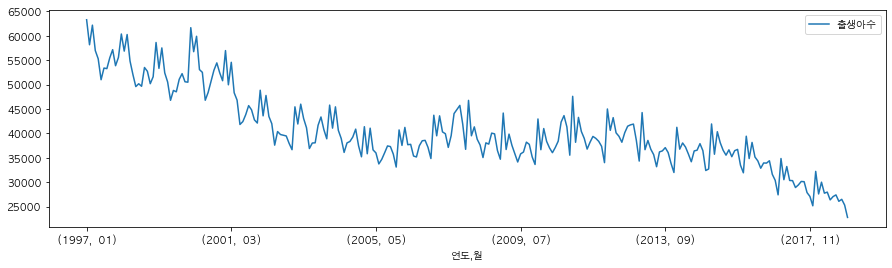

In [31]:
df_all.set_index(["연도", "월"]).plot(figsize=(15, 4))

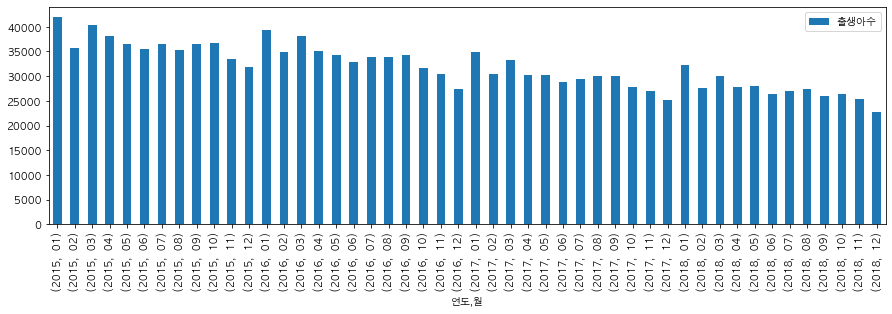

In [36]:
df_all[-48:].set_index(["연도", "월"]).plot.bar(figsize=(15, 4))

In [38]:
import seaborn as sns

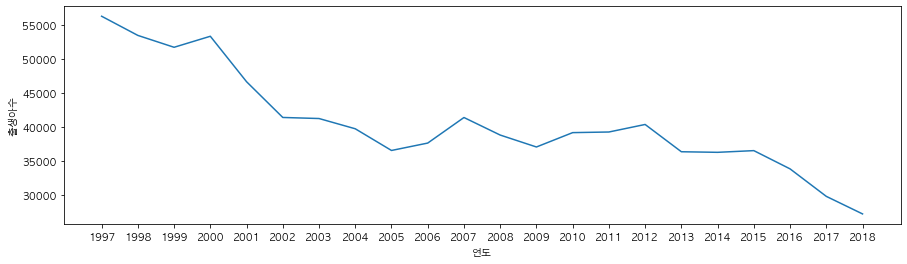

In [44]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_all, x="연도", y="출생아수", ci=None)

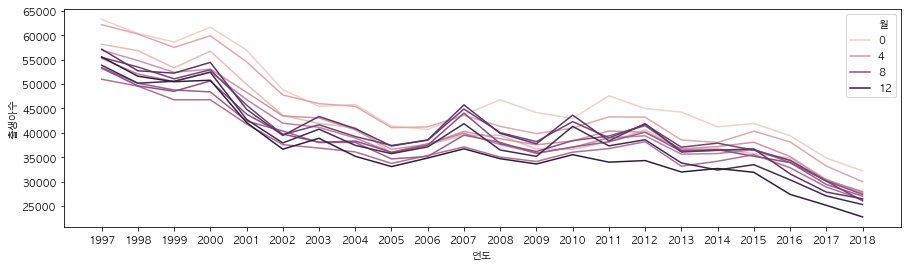

In [46]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_all, x="연도", y="출생아수", ci=None, hue="월")

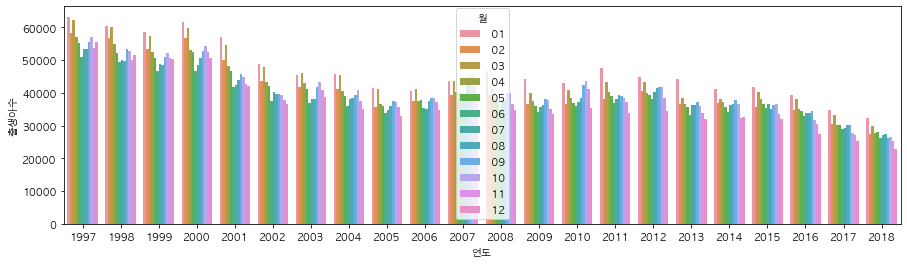

In [47]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_all, x="연도", y="출생아수", ci=None, hue="월")

* 관련기사 : [저출산 시대, 두 도시 이야기 - 경향신문](http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202006271128001)

In [54]:
df_local = df[df["시군구별"] != "전국"].copy()
df_local.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체


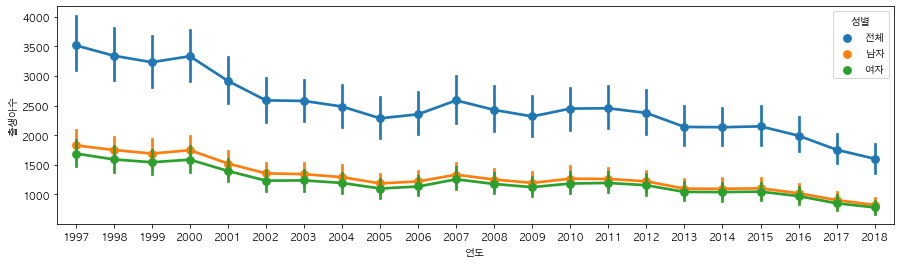

In [57]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_local, x="연도", y="출생아수", hue="성별")

In [62]:
df_local_all = df_local[df_local["성별"] == "전체"]
df_local_all.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체


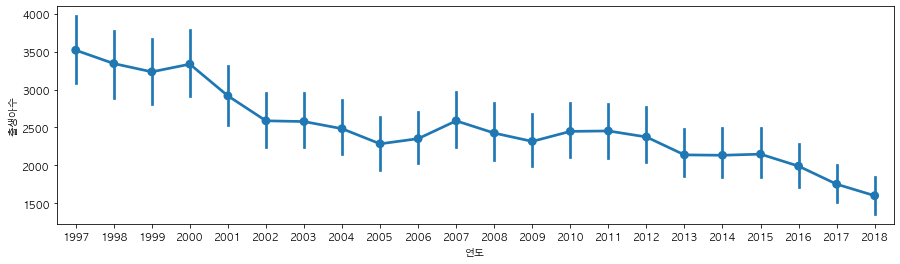

In [64]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_local_all, x="연도", y="출생아수")

In [69]:
df_local_all.columns

Index(['시군구별', '기간', '출생아수', '연도', '월', '성별'], dtype='object')

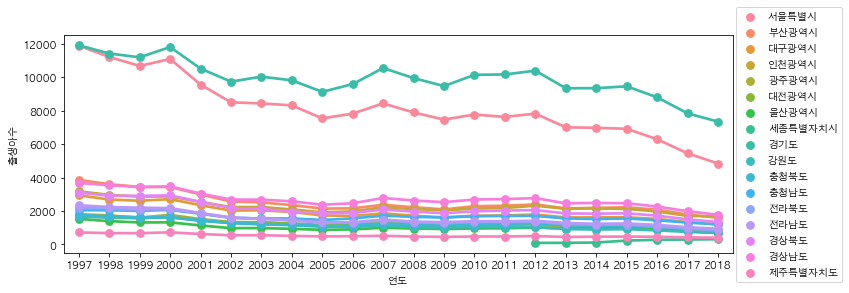

In [77]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=df_local_all, x="연도", y="출생아수", hue="시군구별", ci=None)
plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

In [82]:
df_local_2 = df_local_all[
    df_local_all["시군구별"].isin(
        ["서울특별시", "경기도", "세종특별자치시"])]
df_local_2.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
9,세종특별자치시,1997. 01,NaN,1997,01,전체
10,경기도,1997. 01,13440.0,1997,01,전체
59,서울특별시,1997. 02,12239.0,1997,02,전체
66,세종특별자치시,1997. 02,NaN,1997,02,전체


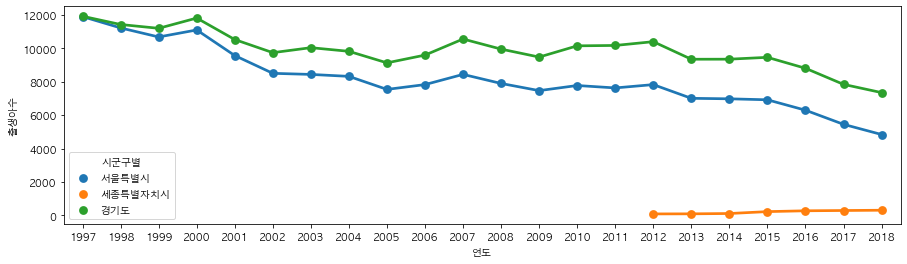

In [85]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_local_2, x="연도", y="출생아수", ci=None, hue="시군구별")

In [90]:
df_sj = df[df["시군구별"] == "세종특별자치시"].dropna(how="any")
df_sj.head()

,시군구별,기간,출생아수,연도,월,성별
10269,세종특별자치시,2012. 01,73.0,2012,01,전체
10288,세종특별자치시,2012. 01.1,38.0,2012,01,남자
10307,세종특별자치시,2012. 01.2,35.0,2012,01,여자
10326,세종특별자치시,2012. 02,74.0,2012,02,전체
10345,세종특별자치시,2012. 02.1,43.0,2012,02,남자


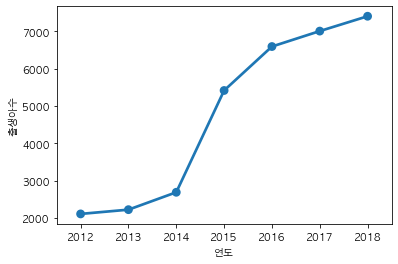

In [94]:
import numpy as np
sns.pointplot(data=df_sj, x="연도", y="출생아수", ci=None, estimator=np.sum)

In [103]:
df_local_all

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체
...,...,...,...,...,...,...
15005,전라북도,2018. 12,640.0,2018,12,전체
15006,전라남도,2018. 12,790.0,2018,12,전체
15007,경상북도,2018. 12,1159.0,2018,12,전체
15008,경상남도,2018. 12,1399.0,2018,12,전체


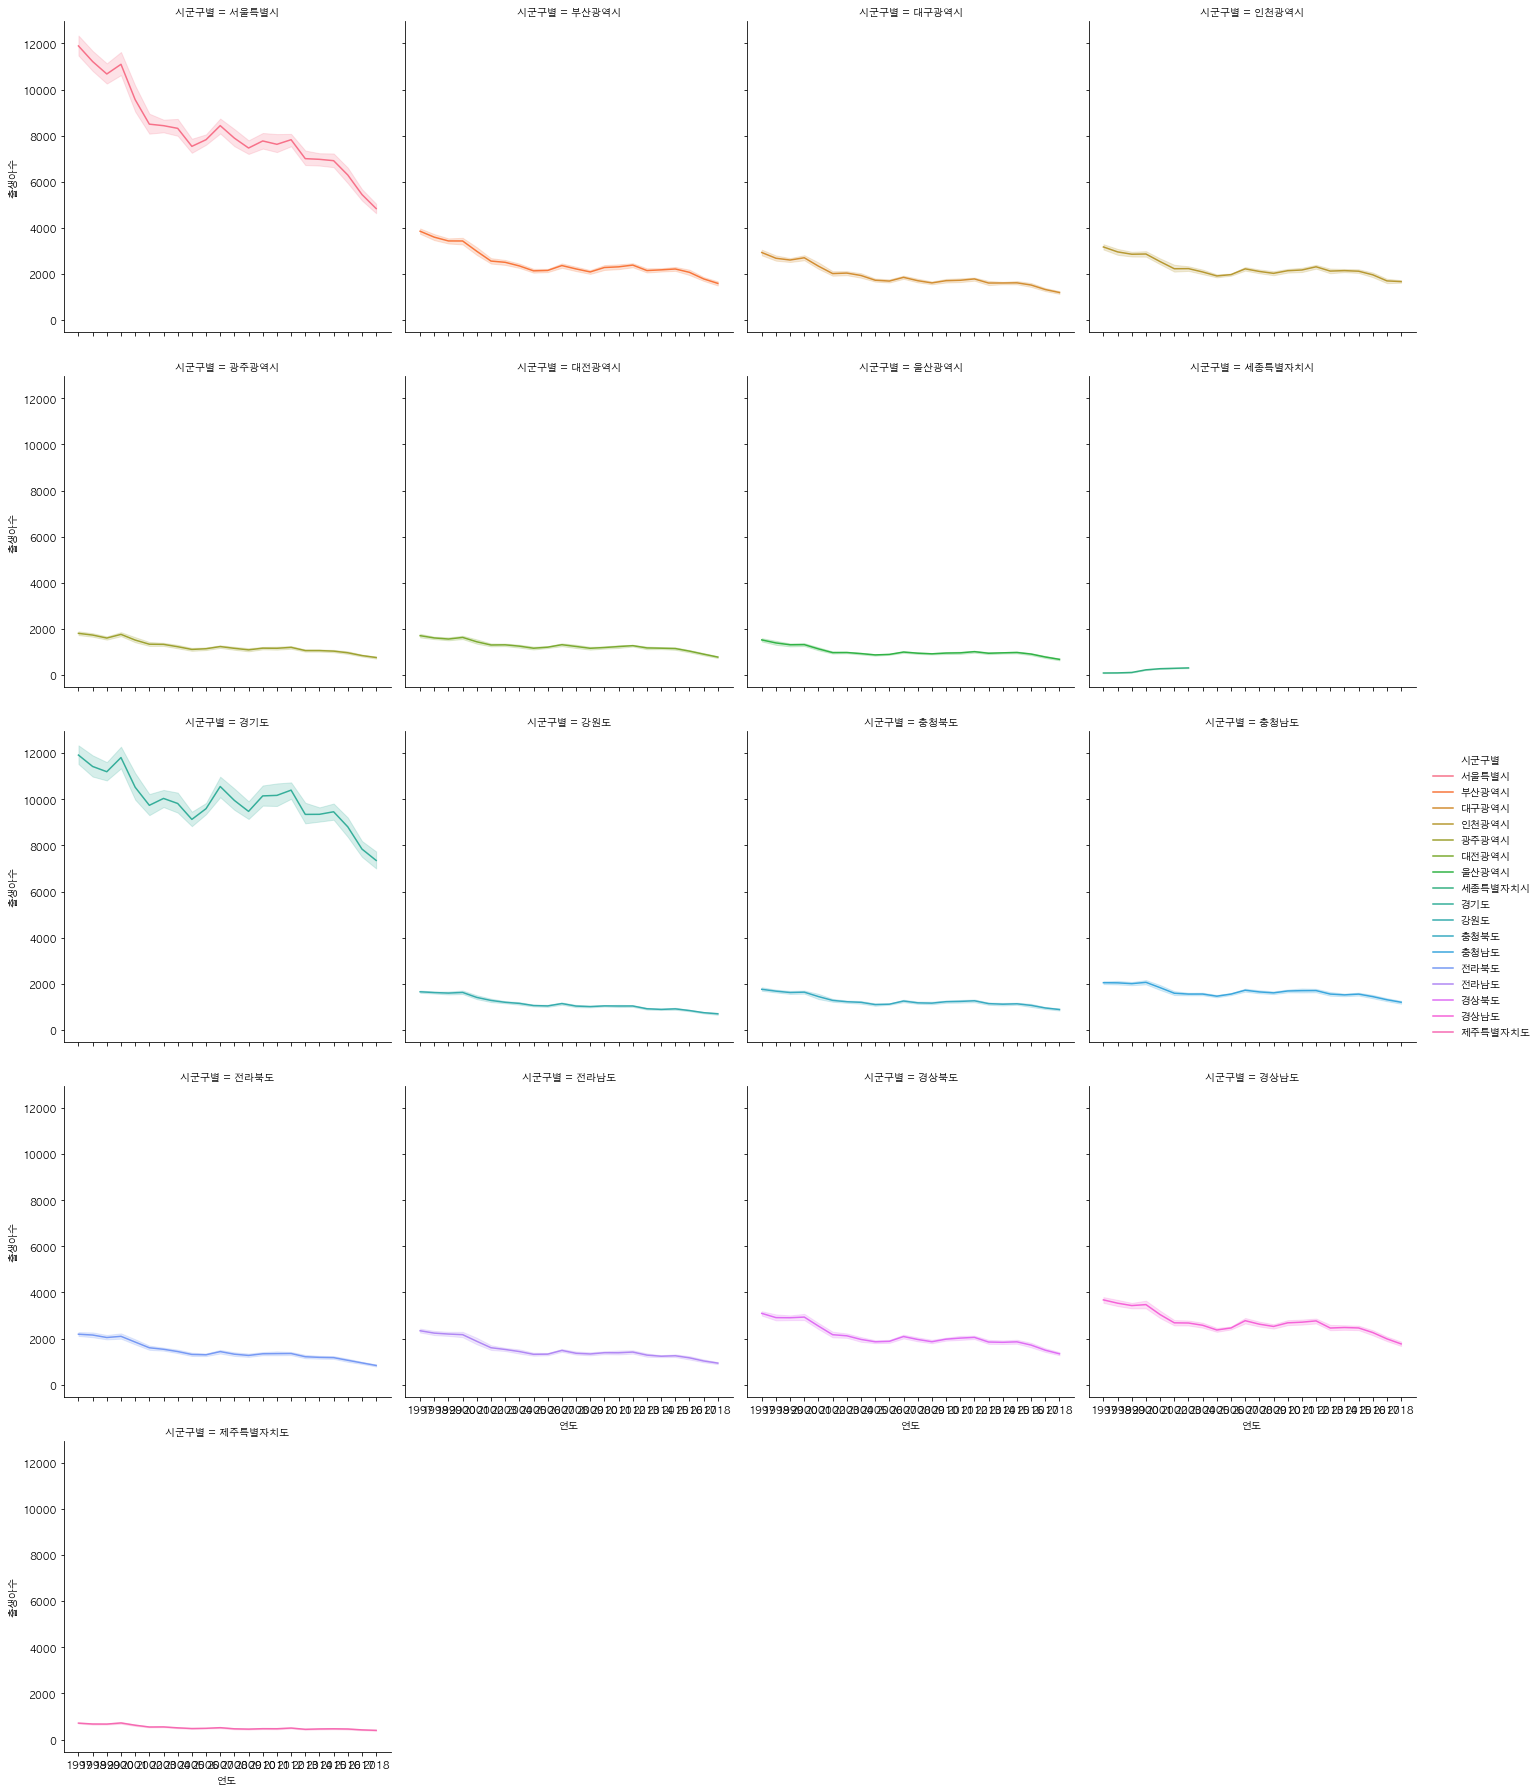

In [108]:
sns.relplot(data=df_local_all.sort_values(by=["연도", "월"]), x="연도", y="출생아수", kind="line", 
            col="시군구별", col_wrap=4, hue="시군구별")